<a href="https://colab.research.google.com/github/KravtsovaAlyona/ETL/blob/main/28_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем JSON-файл
with open("launches.json") as f:
    data = json.load(f)

In [8]:
df = pd.DataFrame(data["results"])
print(df[["name", "window_start"]].head())

                                             name          window_start
0                        Spectrum | Maiden Flight  2025-03-29T11:30:00Z
1                 Long March 7A | Unknown Payload  2025-03-29T15:57:00Z
2  Firefly Alpha | FLTA006 (Message in a Booster)  2025-03-30T13:37:00Z
3          Falcon 9 Block 5 | Starlink Group 6-80  2025-03-30T19:16:00Z
4                          Eris-1 | Maiden Flight  2025-03-31T00:00:00Z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10 non-null     object
 1   url                      10 non-null     object
 2   launch_library_id        0 non-null      object
 3   slug                     10 non-null     object
 4   name                     10 non-null     object
 5   status                   10 non-null     object
 6   net                      10 non-null     object
 7   window_end               10 non-null     object
 8   window_start             10 non-null     object
 9   inhold                   10 non-null     bool  
 10  tbdtime                  10 non-null     bool  
 11  tbddate                  10 non-null     bool  
 12  probability              0 non-null      object
 13  holdreason               10 non-null     object
 14  failreason               10 non-null     obje

In [33]:
print("Минимальная дата в данных:", df["window_start"].min())
print("Максимальная дата в данных:", df["window_start"].max())
print("Сегодняшняя дата (UTC):", today)
print("Дата 30 дней назад (UTC):", last_month)


Минимальная дата в данных: 2025-03-29 11:30:00+00:00
Максимальная дата в данных: 2025-04-04 22:42:00+00:00
Сегодняшняя дата (UTC): 2025-03-29 05:11:41.462977+00:00
Дата 30 дней назад (UTC): 2025-02-27 05:11:41.462977+00:00


In [26]:
df["window_start"] = pd.to_datetime(df["window_start"], errors="coerce", utc=True)



In [36]:
last_month = (datetime.utcnow() - timedelta(days=30)).replace(tzinfo=pd.Timestamp.utcnow().tz)

df_last_month = df[df["window_start"] >= last_month]

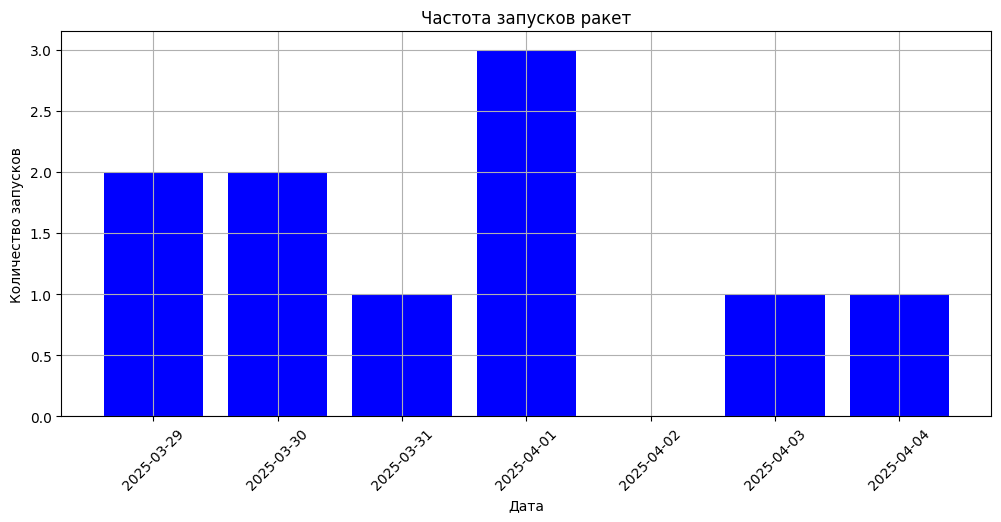

In [42]:
launch_counts = df_last_month["window_start"].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(launch_counts.index, launch_counts.values, linestyle="-", color="b")
plt.xlabel("Дата")
plt.ylabel("Количество запусков")
plt.title("Частота запусков ракет")
plt.xticks(rotation=45)
plt.grid()
plt.show()